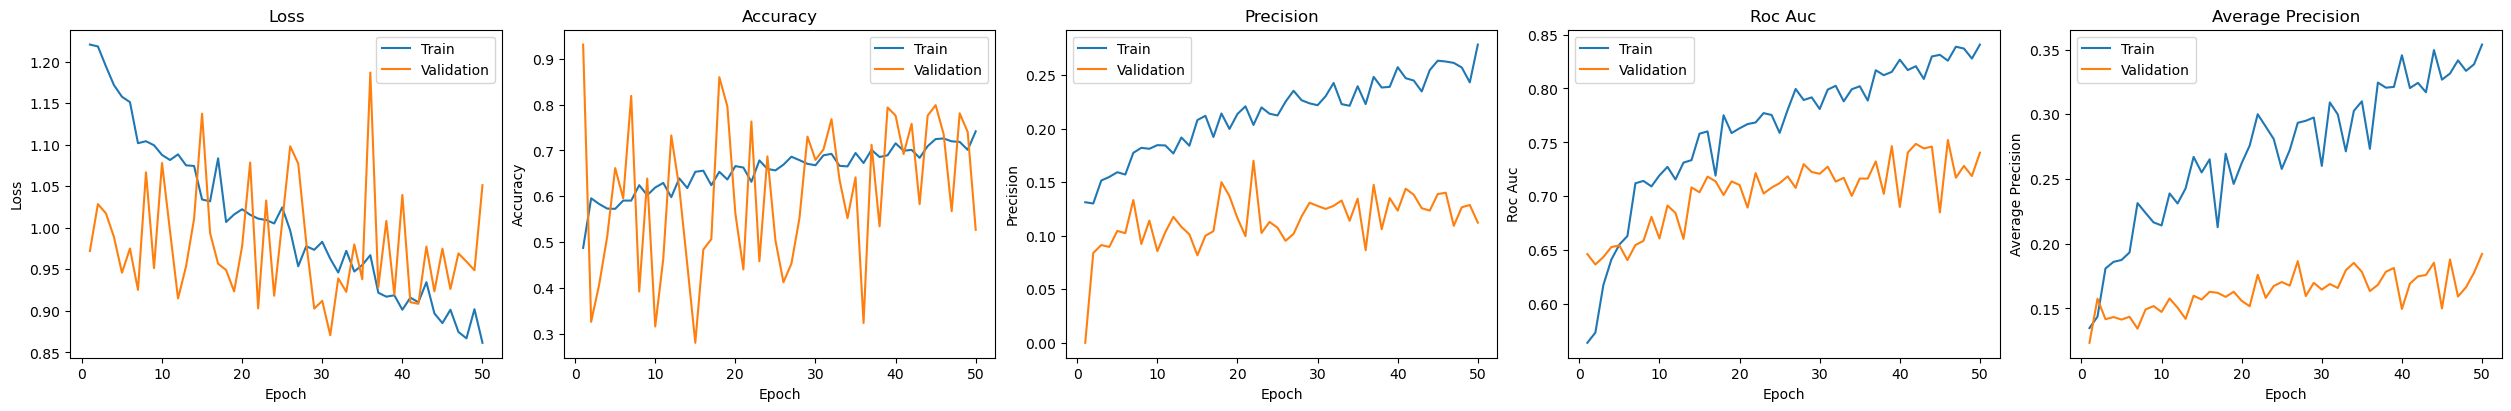

In [3]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

history_path = Path('..\\prototype\\runs\\training_run_mil_epochs50_loaded\\training_history.json')

if not history_path.exists():
    raise FileNotFoundError(f'Training history file not found at {history_path}')

with history_path.open() as f:
    history = json.load(f)

if not history:
    raise ValueError('Training history is empty.')

epochs = [entry['epoch'] for entry in history]
train_loss = [entry['train_loss'] for entry in history]
val_loss = [entry['val_loss'] for entry in history]

metric_names = list(history[0]['train_metrics'].keys())

if not metric_names:
    raise ValueError('Training history entries do not contain metrics.')

train_metrics = {metric: [entry['train_metrics'][metric] for entry in history] for metric in metric_names}
val_metrics = {metric: [entry['val_metrics'][metric] for entry in history] for metric in metric_names}

fig, axes = plt.subplots(1, 1 + len(metric_names), figsize=(5 * (1 + len(metric_names)), 4), constrained_layout=True)
if hasattr(axes, 'ravel'):
    axes = list(axes.ravel())
else:
    axes = [axes]

axes[0].plot(epochs, train_loss, label='Train')
axes[0].plot(epochs, val_loss, label='Validation')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

for ax, metric in zip(axes[1:], metric_names):
    ax.plot(epochs, train_metrics[metric], label='Train')
    ax.plot(epochs, val_metrics[metric], label='Validation')
    ax.set_title(metric.replace('_', ' ').title())
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.legend()

plt.show()
